# Hello there Homo *sapien* on Spaceship Earth!


# Welcome to Rohan Robinson's 19F DALI Data Challenge!

### note: the data for this challenge was from the link below:
#### https://github.com/dali-lab/dali-challenges/blob/master/data/DALI_Data-Anon.json

# -----------------------------------------------------------------------------------------

# I hope to accomplish two things in this challenge 
 ## 1. Understand the differences between male and female DALI members
  ## 2. See if the amount of sleep DALI members get  has an affect the other parts of their lives using linear regression 
 # Onwards!
# ----------------------------------------------------------------------------------
 

# First we're going to split our data into categories

In [160]:
#Gotta get all the Goodies!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

#read in our JSON file with dali member info into a dataframe, special type of data structure provided by pandas
df = pd.read_json (r'DALI_Data-Anon.json')

#separate our data into two categories
males_df = df[df['gender'] == 'Male']
females_df = df[df['gender'] == 'Female']


# Now let's stack gals against guys side by side in a variety of categories

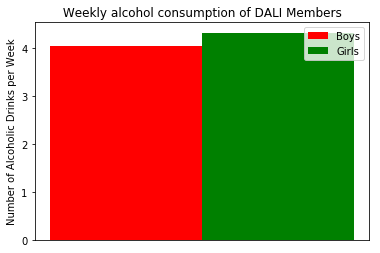

average number of DALI male member drinks per week is 4.04
average number of DALI female member drinks per week is 4.325


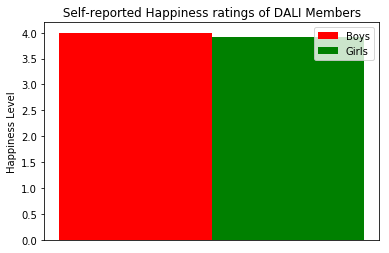

average DALI male member happiness level is 4.0
average DALI female member happiness level is 3.925


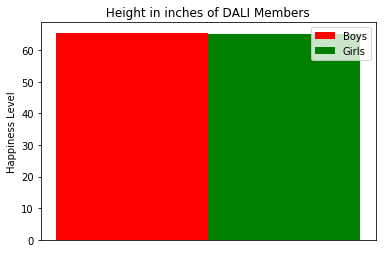

average DALI male member height is 65.52
average DALI female member height is 65.025


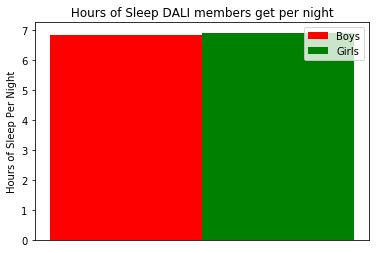

average DALI male member hours of sleep a night is  6.84
average DALI female member hours of sleep a night is  6.9


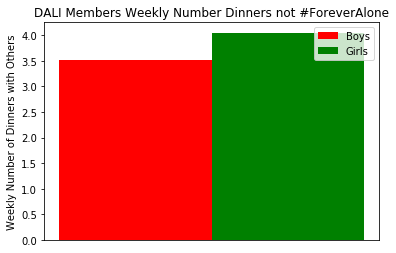

average number of dinners a week male DALI member don't eat alone is  3.52
average number of dinners a week female DALI member don't eat alone is  4.05


In [161]:
#computation for dude averages for continuous features  
males_average_drinks = males_df['alcoholDrinksPerWeek'].mean(axis=0)
males_average_happiness = males_df['happiness'].mean(axis=0)
males_average_height = males_df['heightInches'].mean(axis=0)
males_average_sleep = males_df['sleepPerNight'].mean(axis=0)
males_average_dinners_with_others = males_df['socialDinnerPerWeek'].mean(axis=0)
males_average_drinks = males_df['alcoholDrinksPerWeek'].mean(axis=0)
males_average_hours_in_gym = males_df['gymPerWeek'].mean(axis=0)
males_average_hours_on_phone = males_df['hoursOnScreen'].mean(axis=0)

#computation for girl averages for continuous features  
females_average_drinks = females_df['alcoholDrinksPerWeek'].mean(axis=0)
females_average_happiness = females_df['happiness'].mean(axis=0)
females_average_height = females_df['heightInches'].mean(axis=0)
females_average_sleep = females_df['sleepPerNight'].mean(axis=0)
females_average_dinners_with_others = females_df['socialDinnerPerWeek'].mean(axis=0)
females_average_drinks = females_df['alcoholDrinksPerWeek'].mean(axis=0)
females_average_hours_in_gym = females_df['gymPerWeek'].mean(axis=0)
females_average_hours_on_phone = females_df['hoursOnScreen'].mean(axis=0)






# -----------------------Graphing Alcohol Data---------------------------
ind = np.arange(1) 
width = 0.05       
plt.bar(ind, males_average_drinks, width, label='Boys', color='red')
plt.bar(ind + width, females_average_drinks, width,
    label='Girls', color='green')

plt.ylabel('Number of Alcoholic Drinks per Week')
plt.title(' Weekly alcohol consumption of DALI Members ')
plt.tick_params( 
    axis='x',         
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)
plt.legend(loc='best')
plt.show()
print("average number of DALI male member drinks per week is "  + str(males_average_drinks))
print("average number of DALI female member drinks per week is "  + str(females_average_drinks))





# ---------------------Graphing Happiness Data---------------------
plt.bar(ind, males_average_happiness, width, label='Boys', color='red')
plt.bar(ind + width, females_average_happiness, width,
    label='Girls', color='green')

plt.ylabel('Happiness Level')
plt.title(' Self-reported Happiness ratings of DALI Members ')
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)
plt.legend(loc='best')
plt.show()
print("average DALI male member happiness level is "  + str(males_average_happiness))
print("average DALI female member happiness level is "  + str(females_average_happiness))





# ------------------Graphing Height Data-----------------------------
plt.bar(ind, males_average_height, width, label='Boys', color='red')
plt.bar(ind + width, females_average_height, width,
    label='Girls', color='green')

plt.ylabel('Happiness Level')
plt.title(' Height in inches of DALI Members ')
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)
plt.legend(loc='best')
plt.show()
print("average DALI male member height is "  + str(males_average_height))
print("average DALI female member height is "  + str(females_average_height))




# ------------------Graphing Sleep Data------------------------------
plt.bar(ind, males_average_sleep, width, label='Boys', color='red')
plt.bar(ind + width, females_average_sleep, width,
    label='Girls', color='green')

plt.ylabel('Hours of Sleep Per Night')
plt.title(' Hours of Sleep DALI members get per night ')
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)
plt.legend(loc='best')
plt.show()
print("average DALI male member hours of sleep a night is  "  + str(males_average_sleep))
print("average DALI female member hours of sleep a night is  " + str(females_average_sleep))



# ------------------Graphing Social Dinner Data------------------------------
plt.bar(ind, males_average_dinners_with_others, width, label='Boys', color='red')
plt.bar(ind + width, females_average_dinners_with_others, width,
    label='Girls', color='green')

plt.ylabel('Weekly Number of Dinners with Others')
plt.title('DALI Members Weekly Number Dinners not #ForeverAlone')
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)
plt.legend(loc='best')
plt.show()
print("average number of dinners a week male DALI member don't eat alone is  "  + str(males_average_dinners_with_others))
print("average number of dinners a week female DALI member don't eat alone is  "  + str(females_average_dinners_with_others))


# Wow!
# So DALI members of both lovely genders are very similar in terms of the metrics above
# Interesting!

## ----------------------------------------------------- 


# Now let's use some fancy linear regression to see if sleep affects the other metrics we see here! 


# Before we look into this, I do I have to say it's pretty awesome  that DALI members get approx 7 hours of sleep per night that's a lot higher than the less than 6 hours most college students get  according to the link below
## https://sites.psu.edu/siowfa14/2014/09/16/how-many-hours-of-sleep-should-college-students-get/

In [162]:
#create a model to see how varying sleep affects other values (stress,happiness, alcoholic drinks)
#add sleep data to an array for 'independent value'
hours_sleep =  np.array([])
for dali_member in df.itertuples():
    
    hours_sleep = np.append(hours_sleep, dali_member.sleepPerNight)


#add data to arrays for variable value for dependent values (that model is atempting to predict)
stress_level =  np.array([])
for dali_member in df.itertuples():
    stress_level = np.append(stress_level, dali_member.stressed)

drinks = np.array([])
for dali_member in df.itertuples():
    drinks = np.append(drinks, dali_member.alcoholDrinksPerWeek)

happy_scores = np.array([])
for dali_member in df.itertuples():
    happy_scores = np.append(happy_scores, dali_member.happiness)

#reshape arrays for model builder
hours_sleep = hours_sleep.reshape(-1,1)
stress_level = stress_level.reshape(-1,1)
drinks = drinks.reshape(-1,1)
happy_scores = happy_scores.reshape(-1,1)


#make the linear regression models using our input (hours of sleep) 
#     fitted to a line to predict the output (stress, #drinks, happiness)

regression_model_happy = LinearRegression().fit(hours_sleep, happy_scores)
regression_model_stress = LinearRegression().fit(hours_sleep, stress_level)
regression_model_drinks = LinearRegression().fit(hours_sleep, drinks)


happy_model_slope = regression_model_happy.coef_.item(0)
happy_model_intercept = regression_model_happy.intercept_.item(0)

stress_model_slope = regression_model_stress.coef_.item(0)
stress_model_intercept = regression_model_stress.intercept_.item(0)

drinks_model_slope = regression_model_drinks.coef_.item(0)
drinks_model_intercept = regression_model_drinks.intercept_.item(0)




# Now that we've built our models that have fitted the hours of sleep that DALI members get to the their levels of happiness, stress levels and number of drinks per week, we can visualize these relationships and see if/what's the pattern!

#  :)



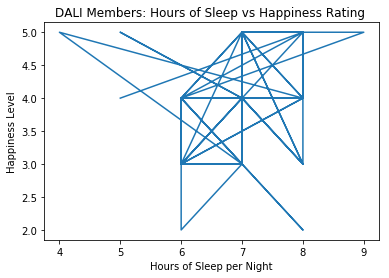

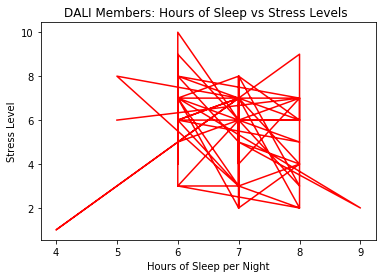

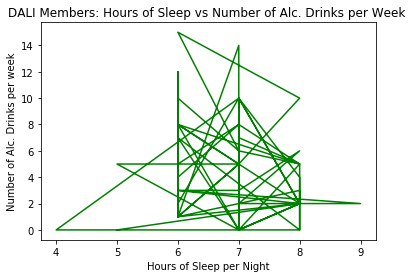

In [163]:
#plot of sleep vs happiness
plt.plot(hours_sleep, happy_scores)
plt.ylabel('Happiness Level')
plt.xlabel('Hours of Sleep per Night')
plt.title('DALI Members: Hours of Sleep vs Happiness Rating ')
plt.show()

#plot of sleep vs stress levels
plt.plot(hours_sleep, stress_level, color="red")
plt.ylabel('Stress Level')
plt.xlabel('Hours of Sleep per Night')
plt.title('DALI Members: Hours of Sleep vs Stress Levels ')
plt.show()

#plot of sleep vs weekly drinks
plt.plot(hours_sleep, drinks, color="green")
plt.ylabel('Number of Alc. Drinks per week')
plt.xlabel('Hours of Sleep per Night')
plt.title('DALI Members: Hours of Sleep vs Number of Alc. Drinks per Week ')
plt.show()






# Damn. Our plots do not display any super clear patterns yikes!

# One way to describe our data is noisy (low signal)

# Let's try to instead of plotting all the points  directly instead use the linear regression parameters (slope, intercept) to see if when can gleam any pattern between sleep and our desired target metrics (Sleep, Stress, # of Alcohol Drinks)

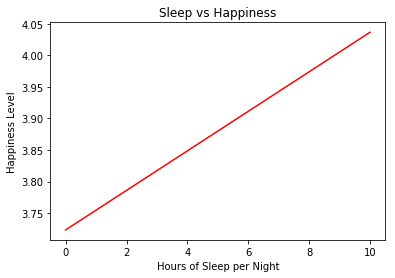

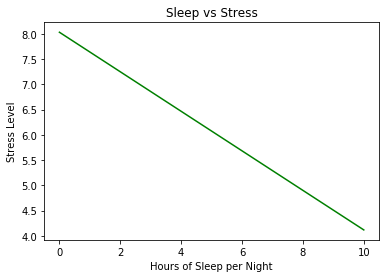

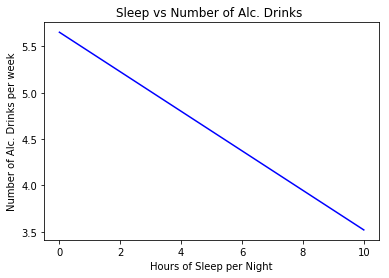

In [164]:
x = np.linspace(0,10,10)

y_happy = happy_model_slope * x + happy_model_intercept
plt.plot(x, y_happy, color = 'red')
plt.title('Sleep vs Happiness')
plt.ylabel('Happiness Level')
plt.xlabel('Hours of Sleep per Night')
plt.show()


y_stress = stress_model_slope * x + stress_model_intercept
plt.plot(x, y_stress, color = 'green')
plt.title('Sleep vs Stress')
plt.xlabel('Hours of Sleep per Night')
plt.ylabel('Stress Level')
plt.show()

y_drinks = drinks_model_slope * x + drinks_model_intercept
plt.plot(x, y_drinks, color = 'blue')
plt.title('Sleep vs Number of Alc. Drinks ')
plt.xlabel('Hours of Sleep per Night')
plt.ylabel('Number of Alc. Drinks per week')
plt.show()



# Remember our models have alot of error in them so these lines are not super accurate.

# However the lines do capture our (or atleast my) intuition!

# The first line shows happiness increasing with more sleep
# The second line shows stress decreasing with more sleep
# The final line shows number of alcoholic drinks per week decreasing with more sleep


# Well that brings us to the end of my Data Challenge. I hope you enjoyed it. 
# At the very least we've learned that sleeping more might make us more happy, less stressed and less likely to drink alot. 

# Thank you and have a great day!